In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('region25.csv')

In [3]:
# Первые 5 строк датасета
data.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Fiat,124 Spider,Открытый,Синий,Бензин,NaN,8000.0,Автомат,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/fiat/124_spider/47...,Только сегодня с таможни забрали Как новый! Кр...,2022-08-20 04:00:00
1,BMW,i3,Хэтчбек 5 дв.,Черный,Электро,NaN,12000.0,Автомат,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/bmw/i3/47958301.html,"Электричка +двс V-600cc ,как новая BMW i3 с ге...",2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,Джип 5 дв.,Бордовый,Бензин,2015.0,57000.0,АКПП,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/gle_...,Отличное состояние автомобиля. Комплектация «G...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,Джип 5 дв.,Черный,Бензин,2002.0,200000.0,АКПП,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/mercedes-benz/g-cl...,Продам правильный гелик. Лучшая машина. Полнос...,2022-08-20 04:00:00
4,Audi,Q7,Джип 5 дв.,Белый,Бензин,NaN,67000.0,Автомат,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Владивосток,https://vladivostok.drom.ru/audi/q7/46498184.html,Audi Q7 II S line (252л.с.) 4WD Внедорожник 5 ...,2022-08-20 04:00:00


In [4]:
# Размер датасета - 31 строк, 11 колонок
data.shape

(1513200, 18)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1513200


In [6]:
# Список колонок
data.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'description',
       'parse_date'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

brand                    object
name                     object
bodyType                 object
color                    object
fuelType                 object
year                    float64
mileage                 float64
transmission             object
power                   float64
price                     int64
vehicleConfiguration     object
engineName               object
engineDisplacement       object
date                     object
location                 object
link                     object
description              object
parse_date               object
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

brand - 0
name - 0
bodyType - 0
color - 0
fuelType - 0
year - 0
mileage - 0
transmission - 0
power - 0
price - 0
vehicleConfiguration - 0
engineName - 0
engineDisplacement - 0
date - 0
location - 0
link - 0
description - 0
parse_date - 0


In [9]:
data=data.dropna()

In [11]:
# Основные статистические характеристки набора данных
data.describe()

,year,mileage,power,price
count,985861.000000,985861.000000,985861.000000,9.858610e+05
mean,2010.013526,129232.524666,150.143690,1.472780e+06
std,7.626200,82534.882162,72.414139,1.633662e+06
min,1943.000000,1000.000000,30.000000,2.000000e+04
25%,2006.000000,70000.000000,100.000000,5.600000e+05
50%,2012.000000,120000.000000,136.000000,9.450000e+05
75%,2016.000000,180000.000000,177.000000,1.805000e+06
max,2022.000000,1000000.000000,625.000000,4.150000e+07


In [15]:
# Определим уникальные значения для целевого признака
data['bodyType'].unique()

array(['Джип 5 дв.', 'Хэтчбек 5 дв.', 'Минивэн', 'Седан', 'Универсал',
       'Купе', 'Пикап', 'Лифтбек', 'Хэтчбек 3 дв.', 'Джип 3 дв.',
       'Открытый'], dtype=object)

<AxesSubplot: xlabel='bodyType', ylabel='year'>

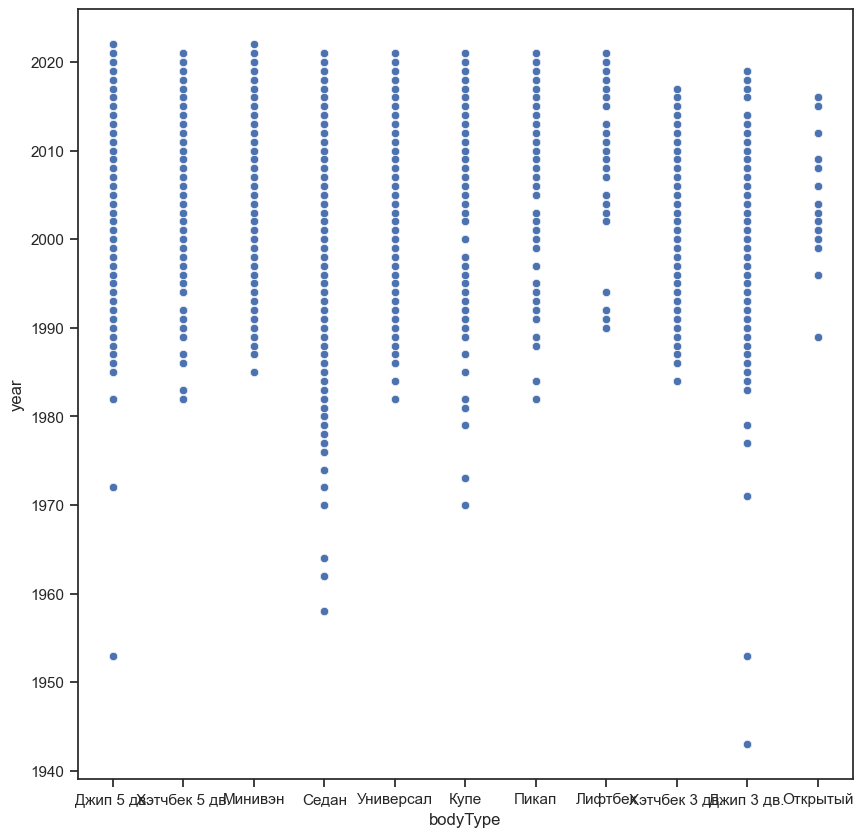

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='bodyType', y='year', data=data)

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\733194885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['year'])


<AxesSubplot: xlabel='year', ylabel='Density'>

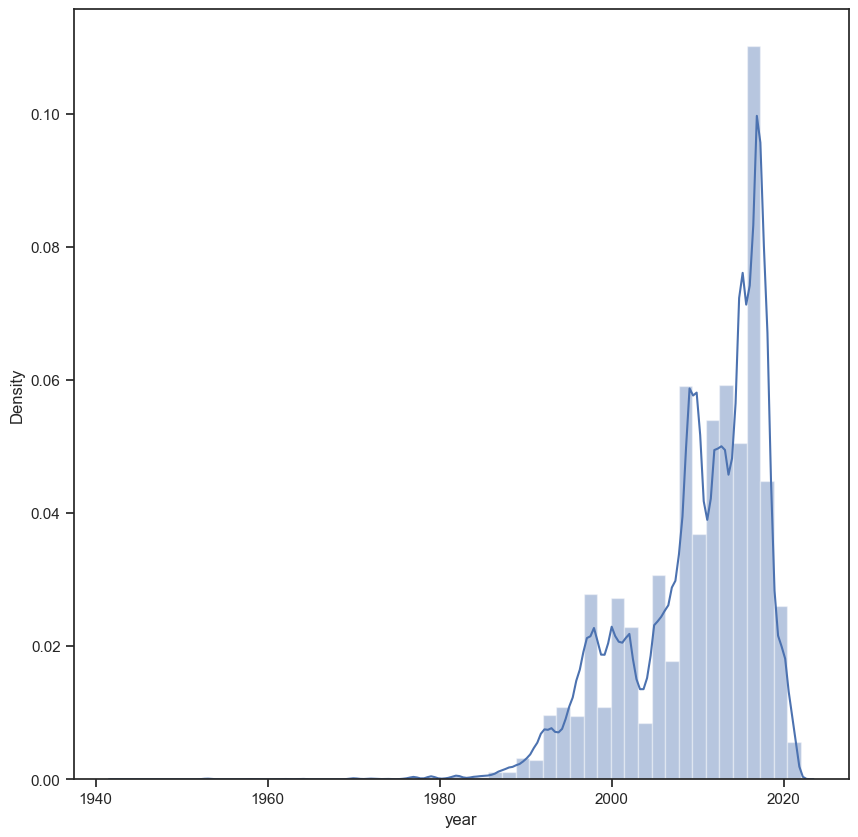

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['year'])

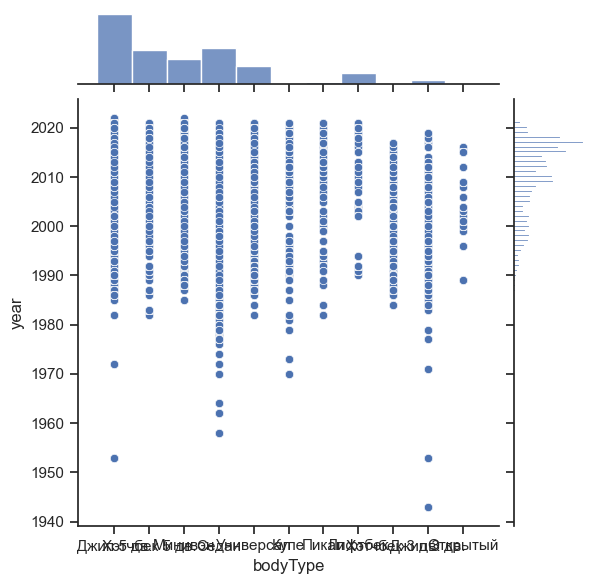

In [21]:
sns.jointplot(x='bodyType', y='year', data=data)

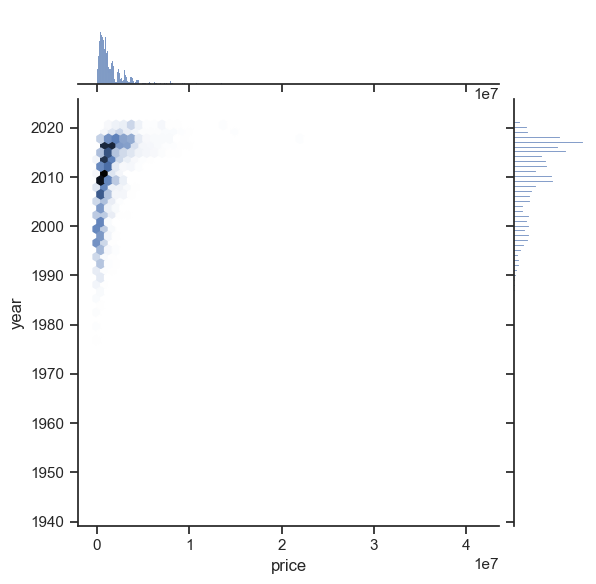

In [23]:
sns.jointplot(x='price', y='year', data=data, kind="hex")

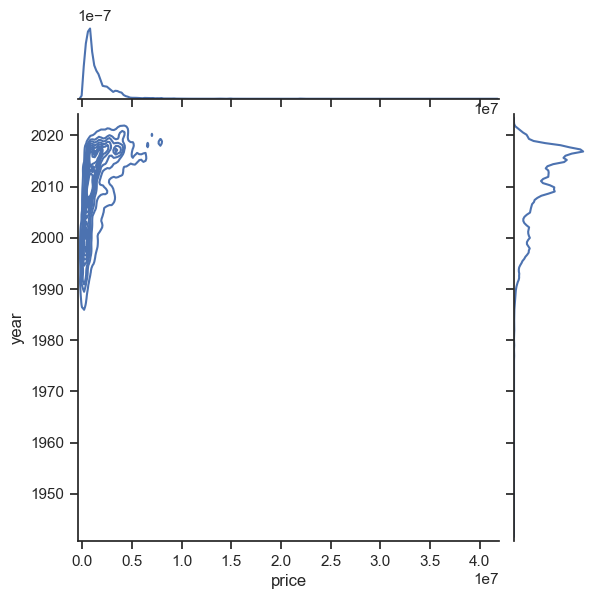

In [24]:
sns.jointplot(x='price', y='year', data=data, kind="kde")

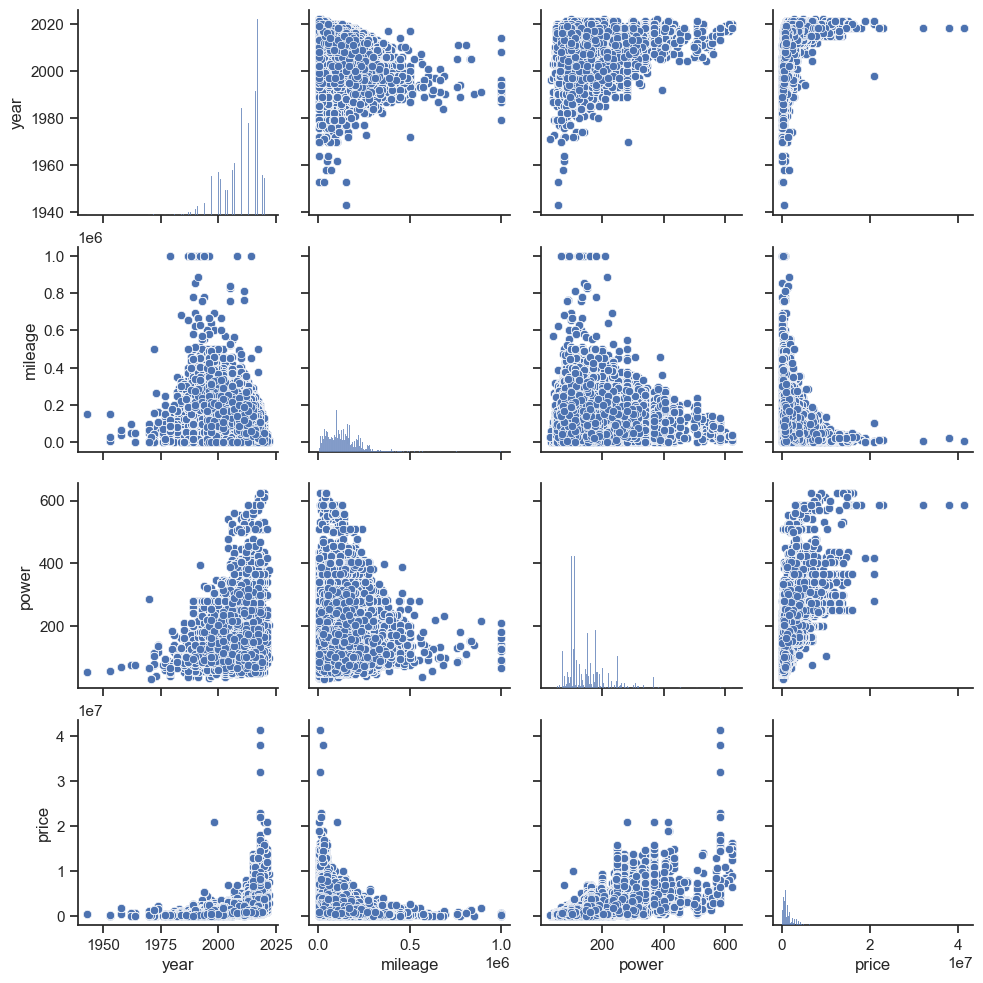

In [25]:
sns.pairplot(data)

<AxesSubplot: xlabel='year'>

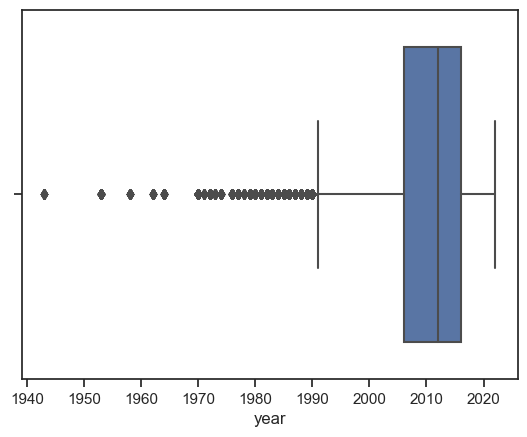

In [26]:
sns.boxplot(x=data['year'])

<AxesSubplot: ylabel='year'>

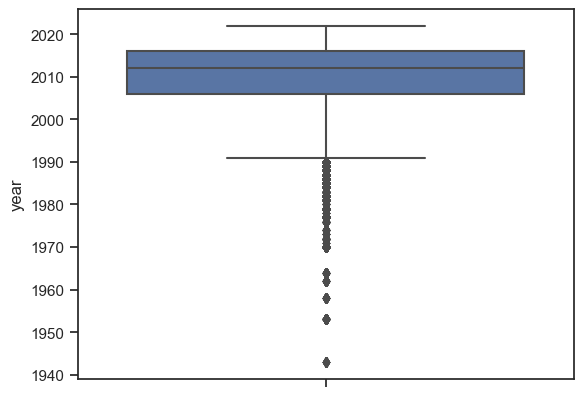

In [27]:
sns.boxplot(y=data['year'])

<AxesSubplot: xlabel='mileage', ylabel='year'>

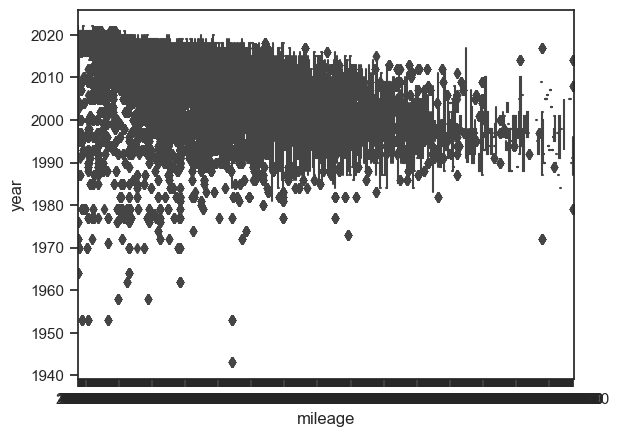

In [28]:
sns.boxplot(x='mileage', y='year', data=data)

<AxesSubplot: xlabel='year'>

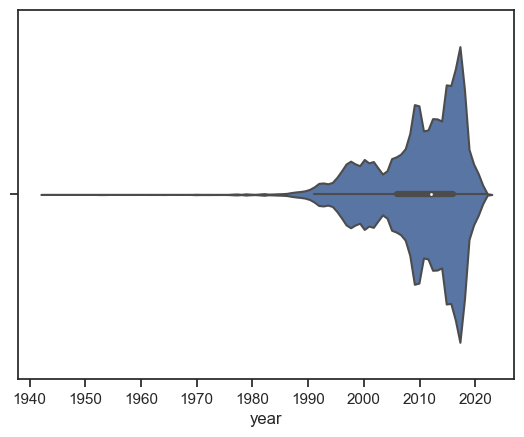

In [29]:
sns.violinplot(x=data['year'])

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\133191414.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['year'], ax=ax[1])


<AxesSubplot: xlabel='year', ylabel='Density'>

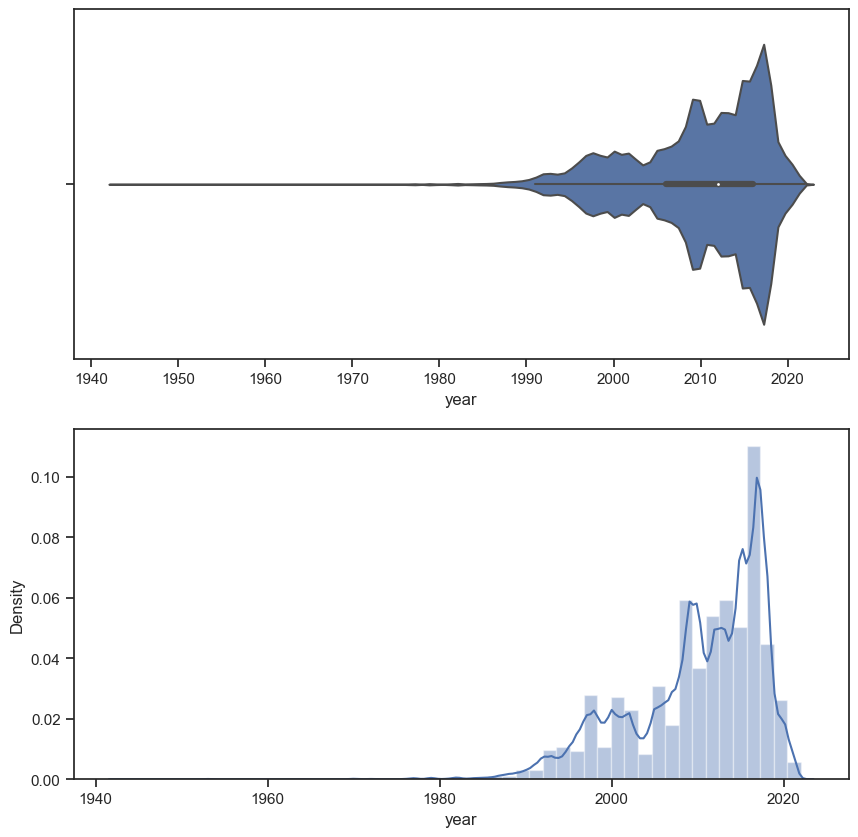

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['year'])
sns.distplot(data['year'], ax=ax[1])

<AxesSubplot: xlabel='mileage', ylabel='year'>

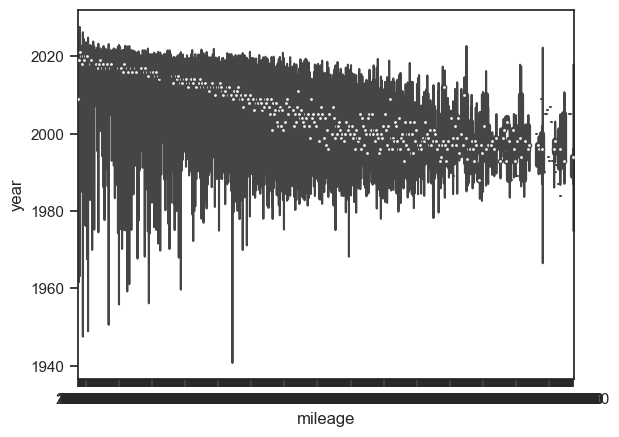

In [31]:
sns.violinplot(x='mileage', y='year', data=data)

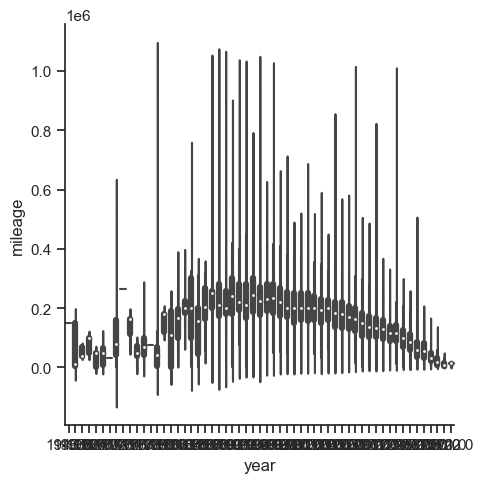

In [32]:
sns.catplot(y='mileage', x='year', data=data, kind="violin", split=True)

In [33]:
data.corr()

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,mileage,power,price
year,1.000000,-0.649021,0.078187,0.479517
mileage,-0.649021,1.000000,-0.043197,-0.396201
power,0.078187,-0.043197,1.000000,0.594523
price,0.479517,-0.396201,0.594523,1.000000


In [34]:
data.corr(method='pearson')


C:\Users\noski\AppData\Local\Temp\ipykernel_17056\140497568.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,year,mileage,power,price
year,1.000000,-0.649021,0.078187,0.479517
mileage,-0.649021,1.000000,-0.043197,-0.396201
power,0.078187,-0.043197,1.000000,0.594523
price,0.479517,-0.396201,0.594523,1.000000


In [35]:
data.corr(method='kendall')


C:\Users\noski\AppData\Local\Temp\ipykernel_17056\3048138329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='kendall')
C:\Users\noski\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,year,mileage,power,price
year,1.000000,-0.554884,0.065352,0.558456
mileage,-0.554884,1.000000,-0.041201,-0.385330
power,0.065352,-0.041201,1.000000,0.399163
price,0.558456,-0.385330,0.399163,1.000000


In [36]:
data.corr(method='spearman')

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2316115903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,year,mileage,power,price
year,1.000000,-0.719572,0.092162,0.731627
mileage,-0.719572,1.000000,-0.063092,-0.539501
power,0.092162,-0.063092,1.000000,0.555560
price,0.731627,-0.539501,0.555560,1.000000


C:\Users\noski\AppData\Local\Temp\ipykernel_17056\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

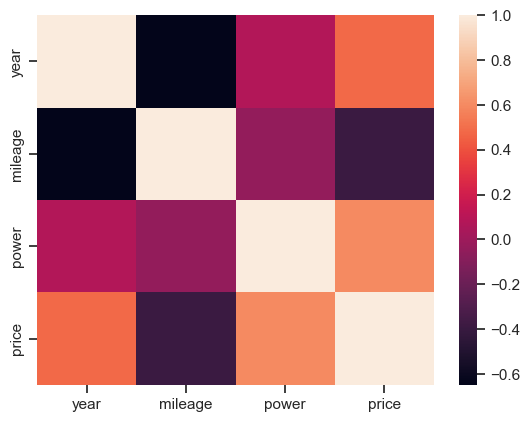

In [37]:
sns.heatmap(data.corr())

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\3346571371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f')


<AxesSubplot: >

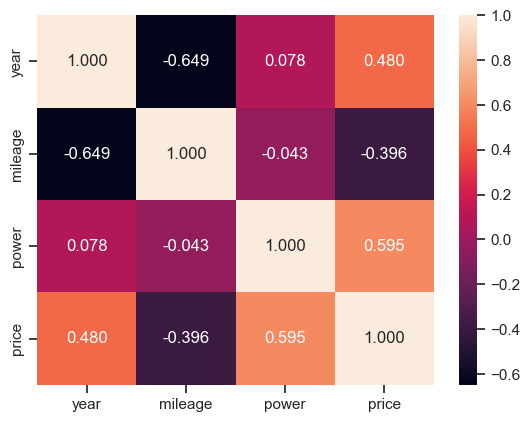

In [38]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2040162464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')


<AxesSubplot: >

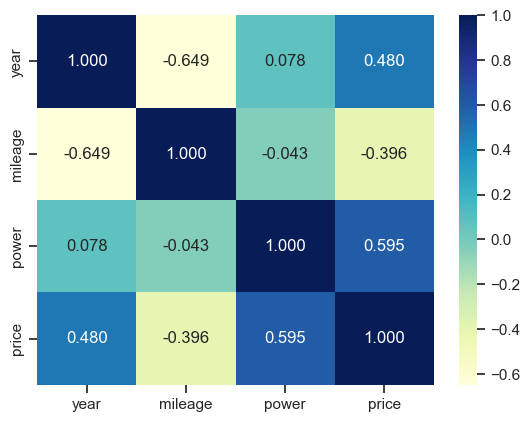

In [39]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\3416325094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype=np.int64)
C:\Users\noski\AppData\Local\Temp\ipykernel_17056\3416325094.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')


<AxesSubplot: >

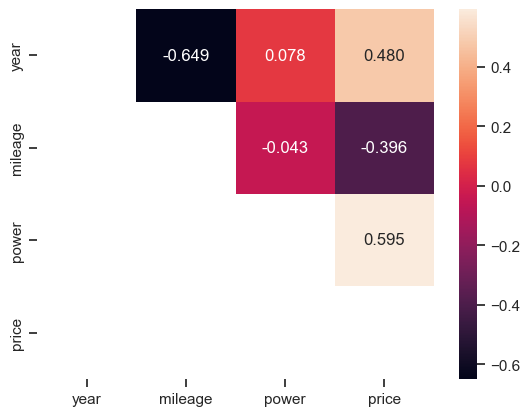

In [40]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.int64)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2698977660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2698977660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
C:\Users\noski\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2698977660.

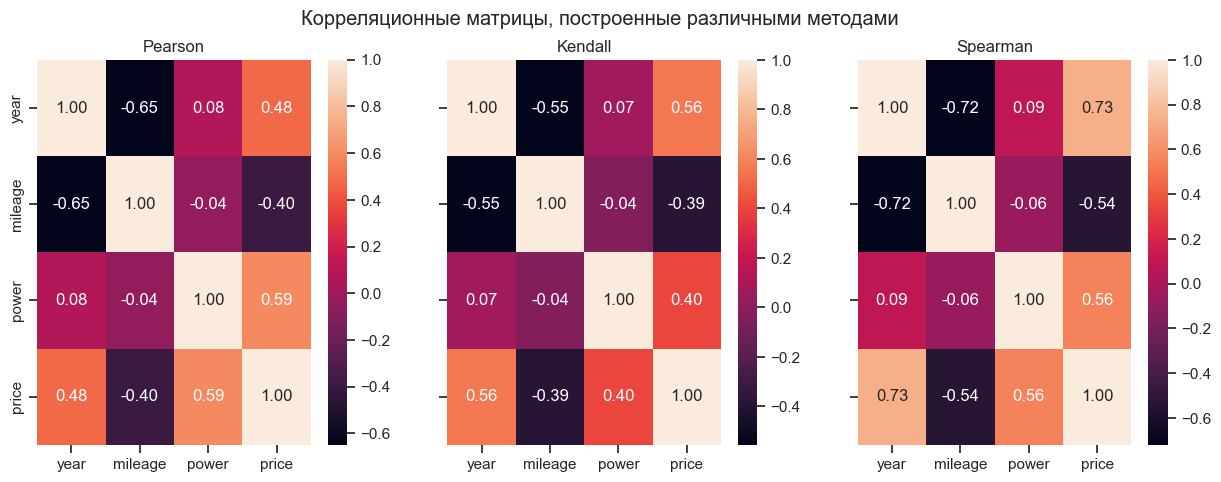

In [41]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

C:\Users\noski\AppData\Local\Temp\ipykernel_17056\2508226105.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')


<AxesSubplot: >

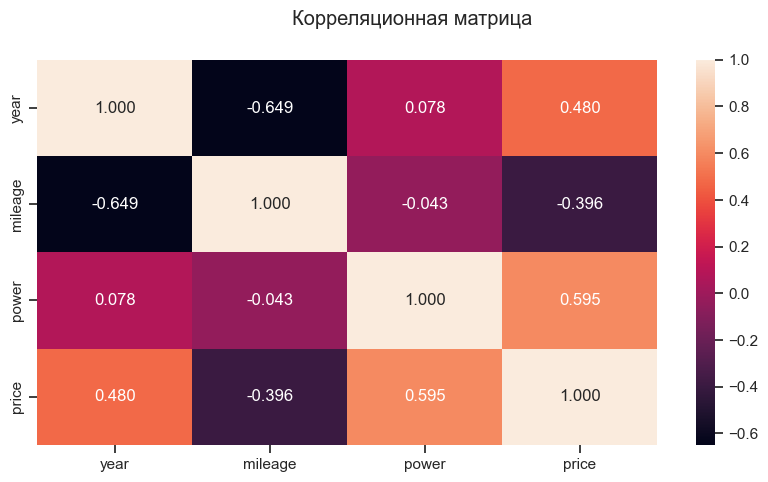

In [43]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')